In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn

TRAIN_NUMERIC = "./train_numeric.csv"
features_names = [
    'L0_S11_F298', 'L1_S24_F1672', 'L1_S24_F766', 'L1_S24_F1844',
    'L1_S24_F1632', 'L1_S24_F1723', 'L1_S24_F1846', 'L1_S25_F2761',
    'L1_S25_F2193'
]

features = pd.read_csv(TRAIN_NUMERIC, index_col = 0, nrows=10000, usecols=(features_names+['Response'])).reset_index()
for f in features.columns[:-1]:
    #Complement NAs by median
    features[f][np.isnan(features[f])] = features[f].median()
    
X_neg,X_pos = features[features.Response==0],features[features.Response==0]

/Users/xiuqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [2]:
volumns = len(X_pos) if len(X_pos)<len(X_neg) else len(X_neg)
features = pd.concat([X_pos,X_neg]).reset_index(drop=True)
features.iloc[:10,:]

,L0_S11_F298,L1_S24_F766,L1_S24_F1632,L1_S24_F1672,L1_S24_F1723,L1_S24_F1844,L1_S24_F1846,L1_S25_F2193,L1_S25_F2761,Response
0,-0.112,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
1,-0.012,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
2,-0.012,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
3,-0.012,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
4,0.088,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
5,-0.012,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
6,-0.012,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
7,-0.012,-0.316,-0.001,0.144,-0.006,-0.123,0.111,-0.046,0.016,0
8,-0.012,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0
9,-0.012,-0.316,-0.001,0.002,0.003,0.001,-0.011,-0.046,0.016,0


Finihsed


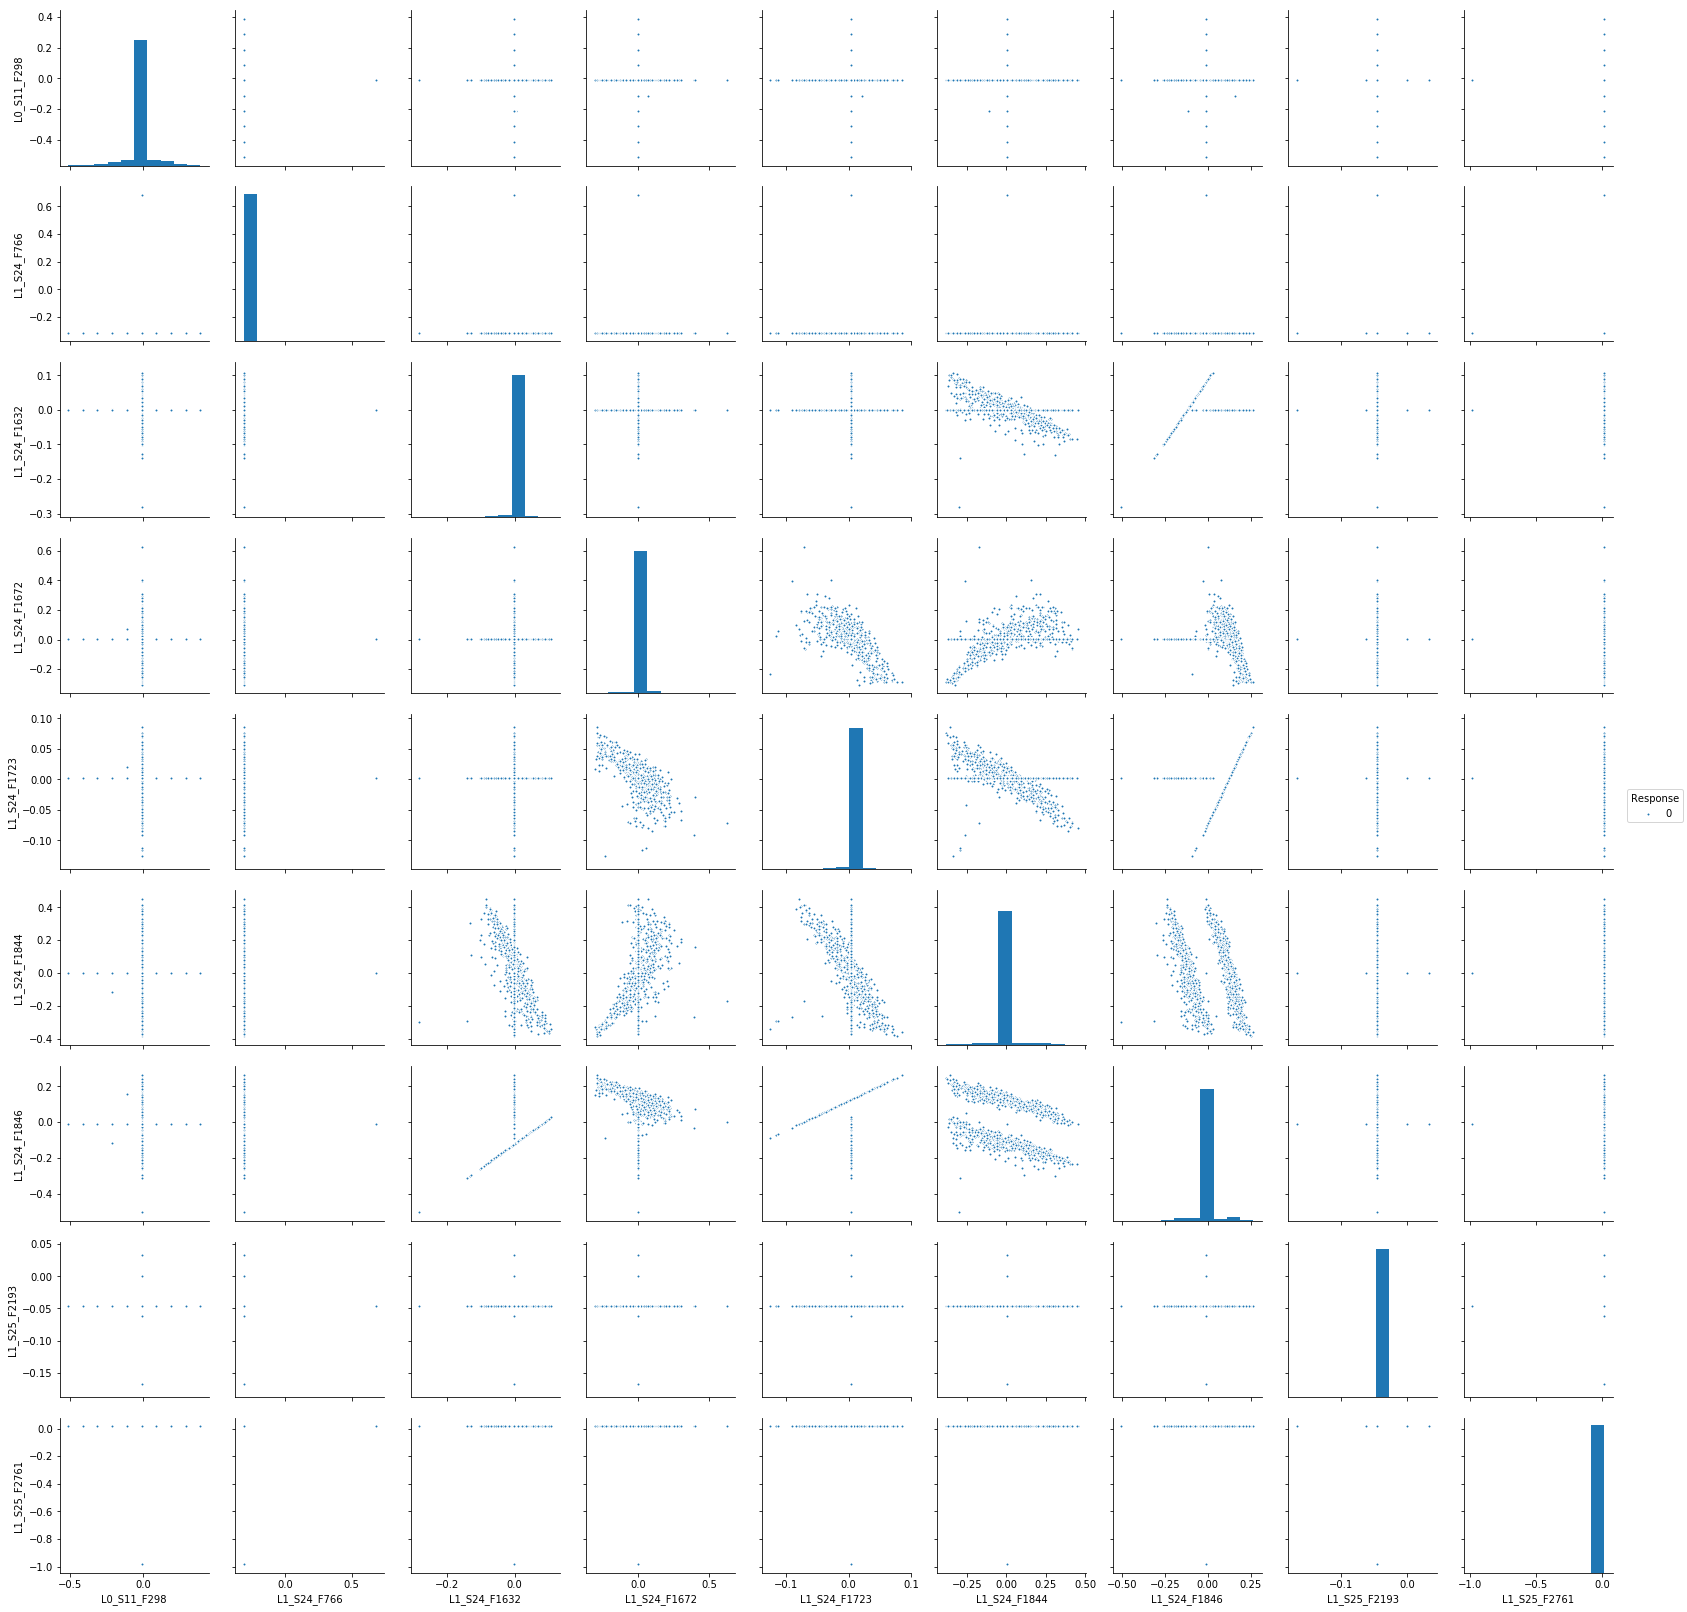

In [5]:
%matplotlib inline
sbn.pairplot(features,hue="Response",vars=features.columns.tolist()[:-1],markers='.')
print("Finihsed")